In [ ]:
# Q1, Q2 Avg and Median Sales of time window of different sizes
# 

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

/var/folders/5t/lc4j166d5f9bxc652fwvc0hc0000gn/T/ipykernel_50859/508479046.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
pd.to_datetime(test_df['Date'].max()) - pd.to_datetime(test_df['Date'].min())

Timedelta('47 days 00:00:00')

In [5]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Month'] = train_df['Date'].dt.month
train_df['Quarter'] = train_df['Date'].dt.quarter
train_df['Year'] = train_df['Date'].dt.year

In [20]:
train_df.shape

(1017209, 12)

In [27]:
# Compute past quarter sales per store
quarterly_sales = (
    train_df.groupby(['Store', 'Year', 'Quarter'])['Sales']
    .median()
    .reset_index()
    .rename(columns={'Quarter': 'PastQuarter', 'Sales': 'PastQuarterSales'})
)

# Shift past quarter sales **within each store**
quarterly_sales['PastQuarterSales'] = quarterly_sales.groupby('Store')['PastQuarterSales'].shift(1)

# Rename 'PastQuarter' back to 'Quarter' for merging
quarterly_sales = quarterly_sales.rename(columns={'PastQuarter': 'Quarter'})

# Merge with original dataframe
train_df = train_df.merge(quarterly_sales, on=['Store', 'Year', 'Quarter'], how='left')


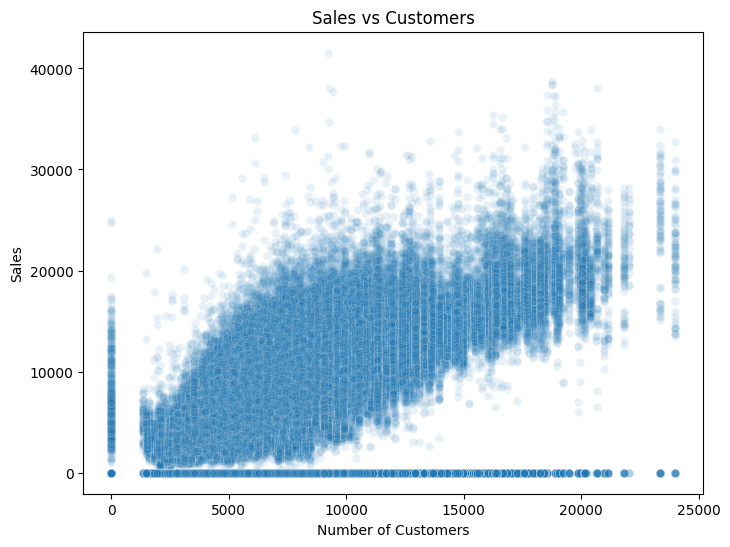

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="PastQuarterSales", 
    y="Sales", 
    data=train_df, 
    alpha=0.1  # Adjust transparency to handle overlapping points
)

plt.title("Sales vs Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Sales") # Log scale for better visualization (if needed)
plt.show()

In [21]:
train_df.merge(quarterly_sales, on=['Store', 'Year', 'Quarter'], how='left')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Quarter,Year,PastQuarter,PastQuarterSales
0,1,5,2015-07-31,5263,555,1,1,0,1,7,3,2015,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,7,3,2015,NaN,NaN
2,3,5,2015-07-31,8314,821,1,1,0,1,7,3,2015,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,3,2015,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,7,3,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136072,1111,2,2013-01-01,0,0,0,0,a,1,1,1,2013,2.0,381609.0
1136073,1112,2,2013-01-01,0,0,0,0,a,1,1,1,2013,2.0,850452.0
1136074,1113,2,2013-01-01,0,0,0,0,a,1,1,1,2013,2.0,459414.0
1136075,1114,2,2013-01-01,0,0,0,0,a,1,1,1,2013,2.0,1501058.0


In [8]:
train_df.groupby('Store')['Sales'].shift(30)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
1017204     4281.0
1017205    11092.0
1017206     6514.0
1017207    19610.0
1017208     4711.0
Name: Sales, Length: 1017209, dtype: float64

In [74]:
train_df = train_df.sort_values(by=['Store', 'Date'])

In [53]:
store1 = train_df[train_df['Store'] == 1].copy()
store1 = store1.drop(columns='median_sales_30_day_window')

In [57]:
store1['Sales']

0          5263
1115       5020
2230       4782
3345       5011
4460       6102
           ... 
1011635    4997
1012750    4486
1013865    4327
1014980    5530
1016095       0
Name: Sales, Length: 942, dtype: int64

In [61]:
store1['rolling_sales'] = store1['Sales'].shift(2).rolling(window=2).mean()

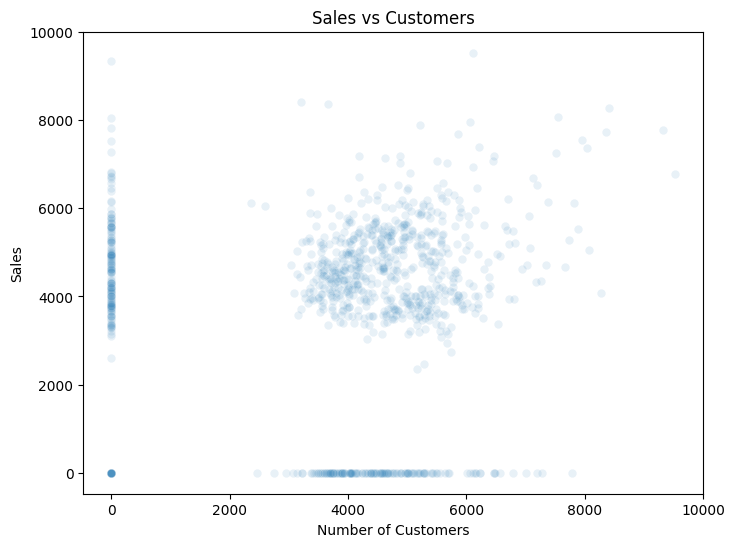

In [73]:
store1['rolling_sales'] = store1['Sales'].shift(4)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="rolling_sales", 
    y="Sales", 
    data=store1, 
    alpha=0.1  # Adjust transparency to handle overlapping points
)

plt.title("Sales vs Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Sales") # Log scale for better visualization (if needed)
plt.show()

In [49]:
train_df['median_sales_30_day_window'] = train_df.groupby('Store')['Sales'].shift(47).rolling(window=120, min_periods=1).mean()
train_df[train_df['Store'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,median_sales_30_day_window
0,1,5,2015-07-31,5263,555,1,1,0,1,NaN
1115,1,4,2015-07-30,5020,546,1,1,0,1,NaN
2230,1,3,2015-07-29,4782,523,1,1,0,1,NaN
3345,1,2,2015-07-28,5011,560,1,1,0,1,NaN
4460,1,1,2015-07-27,6102,612,1,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1,7077.308333
1012750,1,5,2013-01-04,4486,619,1,0,0,1,6869.283333
1013865,1,4,2013-01-03,4327,578,1,0,0,1,7070.083333
1014980,1,3,2013-01-02,5530,668,1,0,0,1,7278.366667


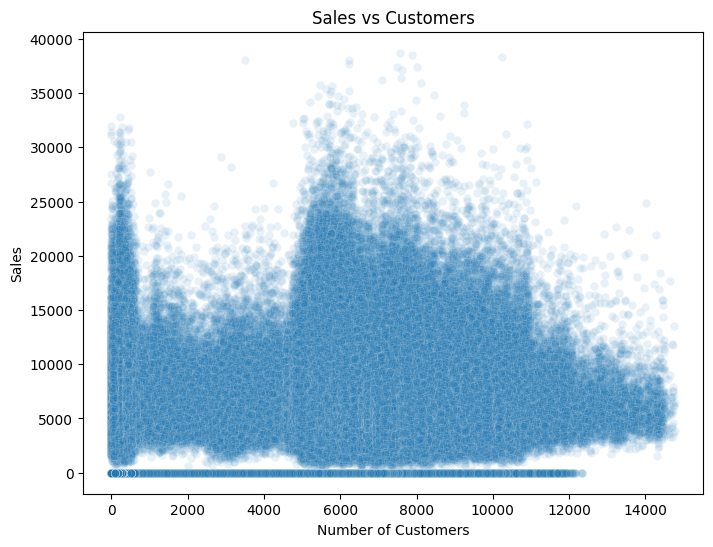

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with transparency
sns.scatterplot(
    x="median_sales_30_day_window", 
    y="Sales", 
    data=train_df, 
    alpha=0.1  # Adjust transparency to handle overlapping points
)

plt.title("Sales vs Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Sales") # Log scale for better visualization (if needed)
plt.show()

In [37]:
train_df[train_df['Store'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,median_sales_30_day_window
0,1,5,2015-07-31,5263,555,1,1,0,1,NaN
1115,1,4,2015-07-30,5020,546,1,1,0,1,NaN
2230,1,3,2015-07-29,4782,523,1,1,0,1,NaN
3345,1,2,2015-07-28,5011,560,1,1,0,1,NaN
4460,1,1,2015-07-27,6102,612,1,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1,6150.5
1012750,1,5,2013-01-04,4486,619,1,0,0,1,5833.0
1013865,1,4,2013-01-03,4327,578,1,0,0,1,6001.5
1014980,1,3,2013-01-02,5530,668,1,0,0,1,6359.0


In [10]:
dummy_df = pd.DataFrame({'store': [1, 1, 1, 2, 2, 2, 3, 3, 3], 'sales': [10, 20, 30, 10, 20, 30, 10, 20, 30]})
dummy_df

,store,sales
0,1,10
1,1,20
2,1,30
3,2,10
4,2,20
5,2,30
6,3,10
7,3,20
8,3,30


In [19]:
dummy_df.groupby('store').shift(1).rolling(window=3).median()

,sales
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
